In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# 学習用データの読み込み
df = np.loadtxt('../files/data3.csv', delimiter=',', skiprows=1)

In [17]:
# 訓練データとテストデータの分離
train_x = df[:, 0:2]
train_y = df[:, 2]

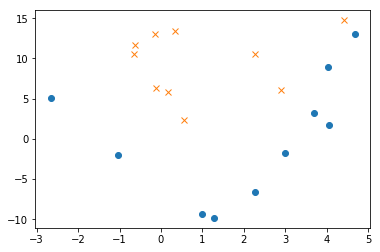

In [18]:
# データをプロットする
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'x')
plt.show()

# ロジスティック回帰の実装

In [19]:
# パラメタの初期化
theta = np.random.rand(4)

In [20]:
# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma

In [21]:
train_z = standardize(train_x)

In [22]:
# x0とx3を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:, 0, np.newaxis] ** 2
    return np.hstack([x0, x, x3])

In [23]:
X = to_matrix(train_z)

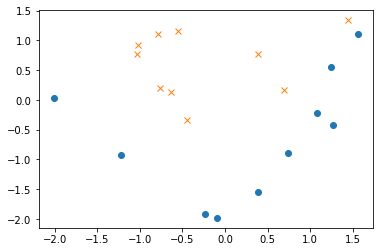

In [24]:
# 標準化後のデータ
# train_x[train_y == 1, 0]はラベルが「1」の変数0番目の値。train_x[train_y == 1, 1]は変数1番目の値
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

### シグモイド関数

$ f\theta(x) = \frac{1}{1 + exp(-\theta^\mathrm{T}x)}  $


In [25]:
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

### パラメタ更新式

$ \displaystyle \theta_j := \theta_j - \eta \sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j $

In [26]:
# 学習率
ETA = 1e-3

In [27]:
# 繰り返し回数
epoch = 5000

In [28]:
# 更新回数
count = 0

In [29]:
# 重みを学習
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    
    # ログ出力
    count += 1
    print('{}回目: theta = {}'.format(count, theta))

1回目: theta = [0.58964487 0.60553073 0.2931385  0.40981179]
2回目: theta = [0.585606   0.60635413 0.28529091 0.40732066]
3回目: theta = [0.58158657 0.60716398 0.27747475 0.40486184]
4回目: theta = [0.57758657 0.60796037 0.26968999 0.40243526]
5回目: theta = [0.57360596 0.6087434  0.2619366  0.40004087]
6回目: theta = [0.56964472 0.60951317 0.25421454 0.39767861]
7回目: theta = [0.5657028  0.6102698  0.24652378 0.39534839]
8回目: theta = [0.56178019 0.61101339 0.23886428 0.39305015]
9回目: theta = [0.55787683 0.61174406 0.23123599 0.39078381]
10回目: theta = [0.55399269 0.6124619  0.22363887 0.38854928]
11回目: theta = [0.55012773 0.61316706 0.21607288 0.38634646]
12回目: theta = [0.5462819  0.61385963 0.20853796 0.38417527]
13回目: theta = [0.54245514 0.61453974 0.20103405 0.3820356 ]
14回目: theta = [0.53864742 0.61520751 0.19356111 0.37992735]
15回目: theta = [0.53485867 0.61586306 0.18611908 0.37785041]
16回目: theta = [0.53108884 0.61650652 0.17870789 0.37580468]
17回目: theta = [0.52733788 0.61713801 0.17132748 0

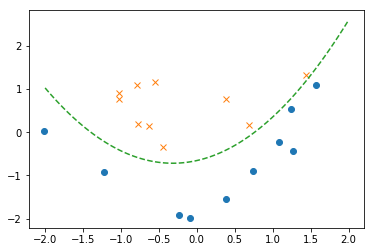

In [32]:
# 結果をプロット

x1 = np.linspace(-2, 2, 100)

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x1, -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2], linestyle='dashed')
plt.show()